In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('impianti.csv', sep=';',decimal='.')
df

,Unnamed: 0.1,Unnamed: 0,IDENTIFICATIVO_IMPIANTO,GENERATORI_NUMERO,EDIFICIO_CATEGORIA,GENERATORE_POTENZA,GENERATORE_COMBUSTIBILE,GENERATORE_DATA_INST,RAPPORTO_DI_CONTROLLO_DATA,RAP_DI_CONTROLLO_ESITO,ISPEZIONE_DATA,ISPEZIONE_ESITO
0,4,4,2f0dc989c2291c7d3fa48f8208ec0ff89,3.0,E8,31.0,GAS NATURALE,2000,2015,Positivo,2019,Positivo
1,14,14,2eedc9b812095cad7f849fe228ec7ff89,1.0,E1,24.0,GAS NATURALE,2011,2018,Positivo,2007,Positivo
2,36,36,2f3d39bfc2094cbd5f34ffb2188c3ff89,1.0,E1,28.1,GAS NATURALE,2008,2018,Positivo,2015,Negativo
3,68,68,2f7a198812f96c0d6f340f72288c6ff89,1.0,E1,23.3,GAS NATURALE,1997,2018,Positivo,2013,Negativo
4,70,70,2f2d49f8d2995cad3f940f6258dc2ff89,1.0,E1,40.0,GASOLIO,2012,2017,Positivo,2016,Positivo
...,...,...,...,...,...,...,...,...,...,...,...,...
365770,3297930,3297930,2f4c297843b93c6dcfb4aff278cc1ff89,1.0,E1,23.0,GAS NATURALE,2004,2017,Positivo,2013,Positivo
365771,3297931,3297931,2f4cf9b982e95cbd1ff4af9258ac4ff89,1.0,E1,27.9,GAS NATURALE,2008,2017,Positivo,2016,Positivo
365772,3297933,3297933,2f8ca9cf12796c2d7fa4ff8218cc0ff89,1.0,E1,27.9,GAS NATURALE,2004,2017,Positivo,2016,Positivo
365773,3297939,3297939,2efd29e802995c6ddf349f62789c7ff89,1.0,E1,26.0,GAS NATURALE,2014,2018,Positivo,2009,Positivo


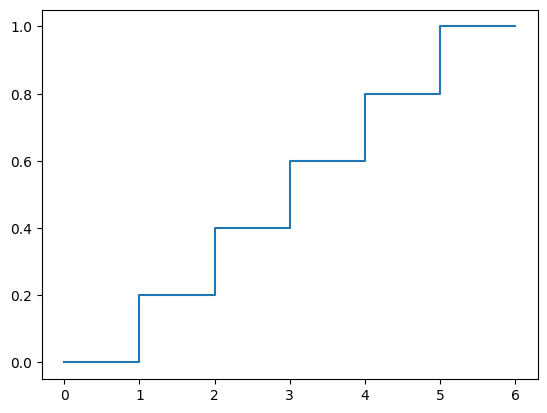

In [3]:
dist=st.randint(1,6)
x=np.arange(0,7,1)
plt.step(x,dist.cdf(x),where='post')
plt.show()

In [4]:
dist=st.norm()
(dist.ppf(1-(0.05/2))/(2*0.01))**2

9603.647051735312

In [5]:
len(df)

365775

In [6]:
df['GENERATORE_POTENZA']

0         31.0
1         24.0
2         28.1
3         23.3
4         40.0
          ... 
365770    23.0
365771    27.9
365772    27.9
365773    26.0
365774    24.0
Name: GENERATORE_POTENZA, Length: 365775, dtype: float64

In [7]:
len(df[df['GENERATORE_DATA_INST']<1940])

0

In [8]:
selezione=df[((df['GENERATORE_POTENZA']<35) & (df['GENERATORE_POTENZA']>15))& (df['GENERATORE_COMBUSTIBILE']=="GAS NATURALE")]
selezione

,Unnamed: 0.1,Unnamed: 0,IDENTIFICATIVO_IMPIANTO,GENERATORI_NUMERO,EDIFICIO_CATEGORIA,GENERATORE_POTENZA,GENERATORE_COMBUSTIBILE,GENERATORE_DATA_INST,RAPPORTO_DI_CONTROLLO_DATA,RAP_DI_CONTROLLO_ESITO,ISPEZIONE_DATA,ISPEZIONE_ESITO
0,4,4,2f0dc989c2291c7d3fa48f8208ec0ff89,3.0,E8,31.0,GAS NATURALE,2000,2015,Positivo,2019,Positivo
1,14,14,2eedc9b812095cad7f849fe228ec7ff89,1.0,E1,24.0,GAS NATURALE,2011,2018,Positivo,2007,Positivo
2,36,36,2f3d39bfc2094cbd5f34ffb2188c3ff89,1.0,E1,28.1,GAS NATURALE,2008,2018,Positivo,2015,Negativo
3,68,68,2f7a198812f96c0d6f340f72288c6ff89,1.0,E1,23.3,GAS NATURALE,1997,2018,Positivo,2013,Negativo
6,74,74,2f4de969c3995c5d6f940fc288fc4ff89,1.0,E1,23.3,GAS NATURALE,2006,2018,Positivo,2008,Positivo
...,...,...,...,...,...,...,...,...,...,...,...,...
365770,3297930,3297930,2f4c297843b93c6dcfb4aff278cc1ff89,1.0,E1,23.0,GAS NATURALE,2004,2017,Positivo,2013,Positivo
365771,3297931,3297931,2f4cf9b982e95cbd1ff4af9258ac4ff89,1.0,E1,27.9,GAS NATURALE,2008,2017,Positivo,2016,Positivo
365772,3297933,3297933,2f8ca9cf12796c2d7fa4ff8218cc0ff89,1.0,E1,27.9,GAS NATURALE,2004,2017,Positivo,2016,Positivo
365773,3297939,3297939,2efd29e802995c6ddf349f62789c7ff89,1.0,E1,26.0,GAS NATURALE,2014,2018,Positivo,2009,Positivo


In [9]:
len(selezione['EDIFICIO_CATEGORIA'].unique())

17

In [10]:
selezione['EDIFICIO_CATEGORIA'].mode()

0    E1
Name: EDIFICIO_CATEGORIA, dtype: object

In [11]:
selezione['EDIFICIO_CATEGORIA'].value_counts(normalize=True)

EDIFICIO_CATEGORIA
E1     0.624327
E11    0.304070
E8     0.032724
E2     0.014601
E5     0.010052
E12    0.004708
E43    0.002350
E3     0.001364
E4     0.001280
E42    0.001243
E13    0.000889
E7     0.000842
E6     0.000647
E41    0.000343
E62    0.000337
E63    0.000135
E61    0.000091
Name: proportion, dtype: float64

62.43%

In [18]:
selezione2=df[(df['GENERATORE_DATA_INST']<2018) & (df['GENERATORE_DATA_INST']>2001)]
gdi=selezione2['GENERATORE_DATA_INST']

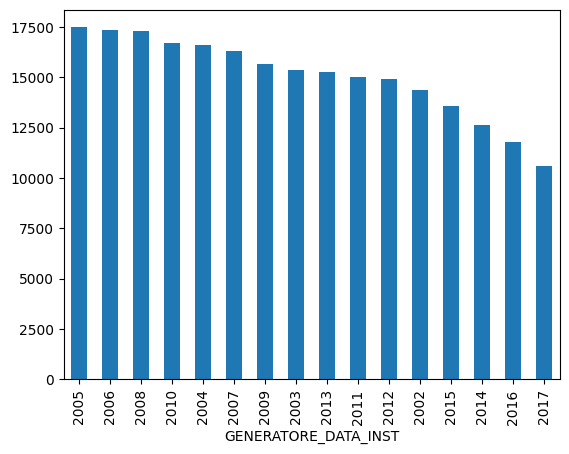

In [19]:
gdi.value_counts().plot.bar()
plt.show()

In [28]:
ie=selezione2['ISPEZIONE_ESITO']
tabella=ie.dropna().value_counts(normalize=True)
tabella

ISPEZIONE_ESITO
Positivo    0.763929
Negativo    0.236071
Name: proportion, dtype: float64

76,39%

In [ ]:
ie.mean()